# CROP RECOMMENDATION SYSTEM 

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [3]:
PATH = 'Crop_recommendation.csv'
df = pd.read_csv(PATH)

# EDA

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
df.size

17600

In [7]:
df.shape

(2200, 8)

In [8]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
df['label']=LabelEncoder().fit_transform(df['label'])
df['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [11]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label            int32
dtype: object

In [12]:
df['label'].value_counts()

label
20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: count, dtype: int64

<Axes: >

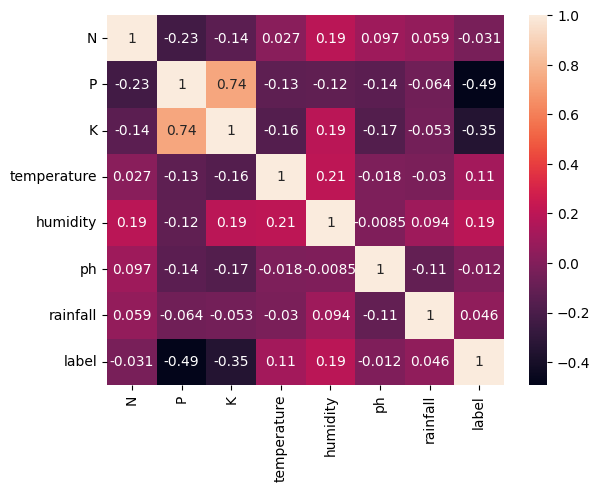

In [13]:
sns.heatmap(df.corr(),annot=True)

# Seperating features and target label

In [14]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [15]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [16]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# 1) Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.59      1.00      0.74        16
           3       1.00      1.00      1.00        21
           4       0.91      1.00      0.95        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.74      0.93      0.83        28
           9       0.00      0.00      0.00        14
          10       0.68      1.00      0.81        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       0.00      0.00      0.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00   

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [20]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

### Saving trained Decision Tree model

In [21]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# 2) Guassian Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.88      1.00      0.93        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00  

In [23]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

### Saving trained Guassian Naive Bayes model

In [24]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# 3) Support Vector Machine (SVM)

In [25]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.10681818181818181
              precision    recall  f1-score   support

           0       1.00      0.23      0.38        13
           1       1.00      0.24      0.38        17
           2       1.00      0.19      0.32        16
           3       1.00      0.05      0.09        21
           4       1.00      0.05      0.09        21
           5       0.00      0.00      0.00        22
           6       1.00      0.05      0.10        20
           7       1.00      0.06      0.11        18
           8       1.00      0.07      0.13        28
           9       0.03      1.00      0.07        14
          10       0.00      0.00      0.00        23
          11       0.00      0.00      0.00        21
          12       0.00      0.00      0.00        26
          13       0.00      0.00      0.00        19
          14       1.00      0.12      0.22        24
          15       1.00      0.30      0.47        23
          16       1.00      0.03      0.

In [26]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.27727273, 0.28863636, 0.29090909, 0.275     , 0.26818182])

### Saving trained SVM model

In [27]:
import pickle
SVM_pkl_filename = 'SVMClassifier.pkl'
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
SVM_Model_pkl.close()

# 4) Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.86      0.75      0.80        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       0.86      0.90      0.88        20
           7       1.00      1.00      1.00        18
           8       0.84      0.93      0.88        28
           9       1.00      1.00      1.00        14
          10       0.88      1.00      0.94        23
          11       0.90      0.86      0.88        21
          12       0.96      1.00      0.98        26
          13       0.84      0.84      0.84        19
          14       1.00      0.96      0.98        24
          15       1.00      1.00      1.00        23
          16       1.00   

In [29]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

### Saving trained Logistic Regression model

In [30]:
import pickle
LR_pkl_filename = 'LogisticRegression.pkl'
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
LR_Model_pkl.close()

# 5) Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.90      1.00      0.95        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00 

In [32]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

### Saving trained Random Forest model

In [33]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# 6) XGBoost

In [34]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.93      0.96      0.95        28
           9       1.00      1.00      1.00        14
          10       0.96      1.00      0.98        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      

In [35]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

array([0.99545455, 0.98863636, 0.99545455, 0.99545455, 0.98863636])

### Saving trained XGBoost model

In [36]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

# 7) KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(Xtrain, Ytrain)

predicted_values = KNN.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('KNN')
print("KNN's Accuracy is: ", x)

print(classification_report(Ytest, predicted_values))

score = cross_val_score(KNN, features, target, cv=5)
print("KNN Cross Validation Scores:", score)

import pickle
KNN_pkl_filename = 'KNNClassifier.pkl'
KNN_Model_pkl = open(KNN_pkl_filename, 'wb')
pickle.dump(KNN, KNN_Model_pkl)
KNN_Model_pkl.close()


KNN's Accuracy is:  0.975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        18
           8       0.89      0.86      0.87        28
           9       0.93      1.00      0.97        14
          10       0.96      1.00      0.98        23
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        26
          13       1.00      0.89      0.94        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
 

# 8) GradientBoostRegression

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the Gradient Boosting classifier
GB = GradientBoostingClassifier()

# Fit the model
GB.fit(Xtrain, Ytrain)

# Predict the values
predicted_values = GB.predict(Xtest)

# Calculate accuracy
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Gradient Boosting')
print("Gradient Boosting's Accuracy is: ", x)

print(classification_report(Ytest, predicted_values))

# Cross validation score (Gradient Boosting)
score = cross_val_score(GB, features, target, cv=5)
print("Gradient Boosting Cross Validation Scores:", score)

# ### Saving trained Gradient Boosting model
import pickle
GB_pkl_filename = 'GradientBoostingClassifier.pkl'
GB_Model_pkl = open(GB_pkl_filename, 'wb')
pickle.dump(GB, GB_Model_pkl)
GB_Model_pkl.close()


Gradient Boosting's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       1.00      0.93      0.96        28
           9       1.00      1.00      1.00        14
          10       1.00      0.96      0.98        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       0.95      1.00      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00     

# 9) ExtraTreesClassifier

In [39]:
from sklearn.ensemble import ExtraTreesClassifier

# Create the Extra Trees classifier
ET = ExtraTreesClassifier(n_estimators=100, random_state=0)

# Fit the model
ET.fit(Xtrain, Ytrain)

# Predict the values
predicted_values = ET.predict(Xtest)

# Calculate accuracy
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Extra Trees')
print("Extra Trees's Accuracy is: ", x)

print(classification_report(Ytest, predicted_values))

# Cross validation score (Extra Trees)
score = cross_val_score(ET, features, target, cv=5)
print("Extra Trees Cross Validation Scores:", score)

# ### Saving trained Extra Trees model
import pickle
ET_pkl_filename = 'ExtraTreesClassifier.pkl'
ET_Model_pkl = open(ET_pkl_filename, 'wb')
pickle.dump(ET, ET_Model_pkl)
ET_Model_pkl.close()


Extra Trees's Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.93      1.00      0.97        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00 

# 10) Cat Boost

In [40]:
pip install catboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
from catboost import CatBoostClassifier

# Create the CatBoost classifier
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=0)

# Fit the model
catboost_model.fit(Xtrain, Ytrain)

# Predict the values
predicted_values = catboost_model.predict(Xtest)

# Calculate accuracy
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('CatBoost')
print("CatBoost's Accuracy is: ", x)

print(classification_report(Ytest, predicted_values))

# Cross validation score (CatBoost)
score = cross_val_score(catboost_model, features, target, cv=5)
print("CatBoost Cross Validation Scores:", score)

# ### Saving trained CatBoost model
import pickle
catboost_pkl_filename = 'CatBoostClassifier.pkl'
catboost_Model_pkl = open(catboost_pkl_filename, 'wb')
pickle.dump(catboost_model, catboost_Model_pkl)
catboost_Model_pkl.close()


CatBoost's Accuracy is:  0.9863636363636363
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.96      0.86      0.91        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00    

# 11) AdaBoostCladdifier

In [42]:
from sklearn.ensemble import AdaBoostClassifier

# Create the AdaBoost classifier
ada_model = AdaBoostClassifier(n_estimators=100, random_state=0)

# Fit the model
ada_model.fit(Xtrain, Ytrain)

# Predict the values
predicted_values = ada_model.predict(Xtest)

# Calculate accuracy
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('AdaBoost')
print("AdaBoost's Accuracy is: ", x)

print(classification_report(Ytest, predicted_values))

# Cross validation score (AdaBoost)
score = cross_val_score(ada_model, features, target, cv=5)
print("AdaBoost Cross Validation Scores:", score)

# ### Saving trained AdaBoost model
import pickle
ada_pkl_filename = 'AdaBoostClassifier.pkl'
ada_Model_pkl = open(ada_pkl_filename, 'wb')
pickle.dump(ada_model, ada_Model_pkl)
ada_Model_pkl.close()


AdaBoost's Accuracy is:  0.16136363636363638
              precision    recall  f1-score   support

           0       0.42      1.00      0.59        13
           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00        16
           3       1.00      1.00      1.00        21
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        28
           9       0.04      1.00      0.07        14
          10       0.00      0.00      0.00        23
          11       0.00      0.00      0.00        21
          12       0.00      0.00      0.00        26
          13       0.00      0.00      0.00        19
          14       0.00      0.00      0.00        24
          15       1.00      1.00      1.00        23
          16       0.00      0.00   

# 12) LightGBM

In [43]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
import lightgbm as lgb

# Create the LightGBM classifier
lgb_model = lgb.LGBMClassifier(n_estimators=100)

# Fit the model
lgb_model.fit(Xtrain, Ytrain)

# Predict the values
predicted_values = lgb_model.predict(Xtest)

# Calculate accuracy
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('LightGBM')
print("LightGBM's Accuracy is: ", x)

print(classification_report(Ytest, predicted_values))

# Cross validation score (LightGBM)
score = cross_val_score(lgb_model, features, target, cv=5)
print("LightGBM Cross Validation Scores:", score)

# ### Saving trained LightGBM model
import pickle
lgb_pkl_filename = 'LightGBMClassifier.pkl'
lgb_Model_pkl = open(lgb_pkl_filename, 'wb')
pickle.dump(lgb_model, lgb_Model_pkl)
lgb_Model_pkl.close()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1332
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.007161
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.042252
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.116360
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.066350
[LightGBM] [Info] Start training from score -3.196403
[LightGBM] [Info] Start training from score -3.018722
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.169004
[LightGBM] 

# 13) MLPClassifier

In [45]:
from sklearn.neural_network import MLPClassifier

# Create the MLP classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=0)

# Fit the model
mlp_model.fit(Xtrain, Ytrain)

# Predict the values
predicted_values = mlp_model.predict(Xtest)

# Calculate accuracy
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('MLP')
print("MLP's Accuracy is: ", x)

print(classification_report(Ytest, predicted_values))

# Cross validation score (MLP)
score = cross_val_score(mlp_model, features, target, cv=5)
print("MLP Cross Validation Scores:", score)

# ### Saving trained MLP model
import pickle
mlp_pkl_filename = 'MLPClassifier.pkl'
mlp_Model_pkl = open(mlp_pkl_filename, 'wb')
pickle.dump(mlp_model, mlp_Model_pkl)
mlp_Model_pkl.close()


MLP's Accuracy is:  0.9477272727272728
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.87      0.81      0.84        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       0.86      0.95      0.90        20
           7       1.00      1.00      1.00        18
           8       0.84      0.75      0.79        28
           9       0.93      1.00      0.97        14
          10       0.88      1.00      0.94        23
          11       0.95      0.86      0.90        21
          12       1.00      1.00      1.00        26
          13       0.88      0.79      0.83        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.0

# Accuracy Comparison

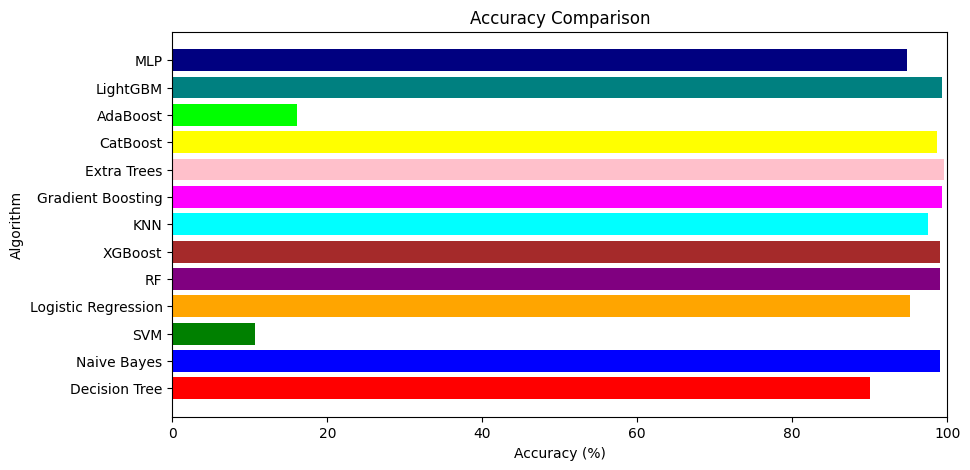

In [46]:
acc = [a * 100 for a in acc]

# Define 6 contrasting colors
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'cyan', 'magenta', 'pink', 'yellow', 'lime', 'teal', 'navy']


# Plotting the horizontal bar chart
plt.figure(figsize=[10,5], dpi=100)
plt.barh(model, acc, color=colors)  # Assign different colors

# Adding titles and labels
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy (%)')
plt.ylabel('Algorithm')

# Optional: Set limits for the x-axis if needed
plt.xlim(0, 100)  # Assuming accuracy is percentage based

# Show the plot
plt.show()

In [47]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 90.0
Naive Bayes --> 99.0909090909091
SVM --> 10.681818181818182
Logistic Regression --> 95.22727272727273
RF --> 99.0909090909091
XGBoost --> 99.0909090909091
KNN --> 97.5
Gradient Boosting --> 99.31818181818181
Extra Trees --> 99.54545454545455
CatBoost --> 98.63636363636363
AdaBoost --> 16.136363636363637
LightGBM --> 99.31818181818181
MLP --> 94.77272727272728


In [48]:
sorted_models = sorted(accuracy_models.items(), key=lambda x: x[1], reverse=True)

# Print the model names
for model_name, accuracy in sorted_models:
    print(model_name, '-->', accuracy)

Extra Trees --> 99.54545454545455
Gradient Boosting --> 99.31818181818181
LightGBM --> 99.31818181818181
Naive Bayes --> 99.0909090909091
RF --> 99.0909090909091
XGBoost --> 99.0909090909091
CatBoost --> 98.63636363636363
KNN --> 97.5
Logistic Regression --> 95.22727272727273
MLP --> 94.77272727272728
Decision Tree --> 90.0
AdaBoost --> 16.136363636363637
SVM --> 10.681818181818182
